# Assignment 7: Image Enhancement
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm xử lí ảnh cơ bản

Yêu cầu thư viện: OpenCV 3.3, matplotlib 

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import cv2
import numpy as np

## I. Histograms, Histogram equalization
Biểu đồ Histogram của ảnh là một dạng biểu đồ biểu diễn sự phân bố của  số lượng điểm ảnh tương ứng với mức độ sáng tối của bức ảnh.
- Trong đó, trục dọc biểu diễn số lượng điểm ảnh, các đỉnh càng cao thì càng có nhiều điểm ảnh ở khu vực đó và độ chi tiết càng nhiều. 
- Trục ngang tính từ trái qua phải với mốc giá trị từ 0 đến 255 biểu diễn độ sáng của mỗi khu vực ảnh. Gốc giá trị 0 được coi là tối nhất tựa như màu đen tuyền trong khi càng dịch sang phải giá trị này càng tăng, ngọn sáng nhất của ánh sáng ở giá trị 255.

Để tính được Histogram của một ảnh, ta có thể dùng một trong các hàm sau:
- cv2.calcHist() - https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html
- plt.hist() - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html


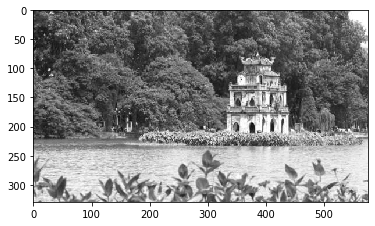

In [2]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

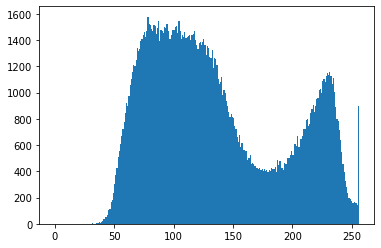

In [3]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

Dựa vào Histogram có thể  biết được bức ảnh là tối (dark) hay sáng (bright).

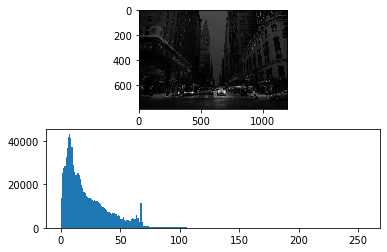

In [4]:
img = cv2.imread('dark.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

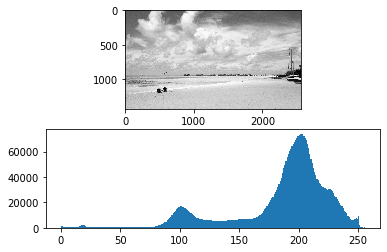

In [5]:
img = cv2.imread('bright.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

Đối với ảnh màu, ta có thể xem Histogram của từng kênh màu

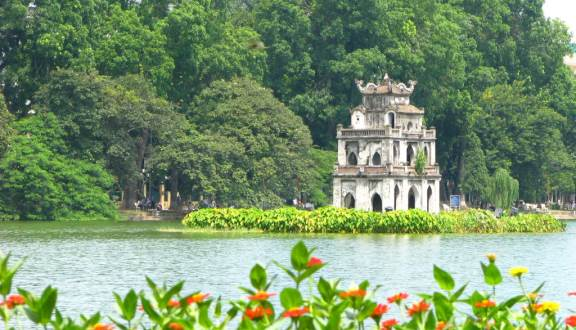

In [6]:
Image('HoGuom.jpg')

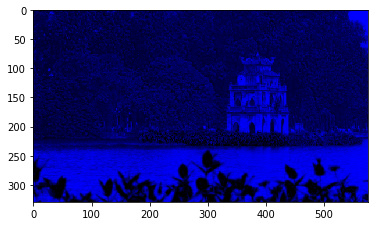

In [7]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[:,:,[0,1]] = 0

plt.imshow(img)

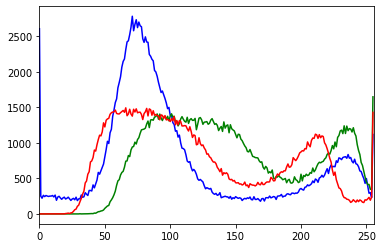

In [8]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_COLOR)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Histogram Equalization

Thư viện OpenCV cung cấp hàm để Equalize Histogram:
- cv2.equalizeHist() - https://docs.opencv.org/2.4/modules/imgproc/doc/histograms.html#equalizehist

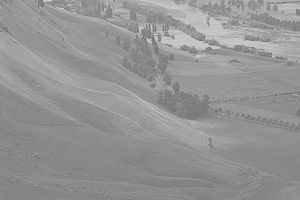

In [9]:
Image('unequalized.jpg')

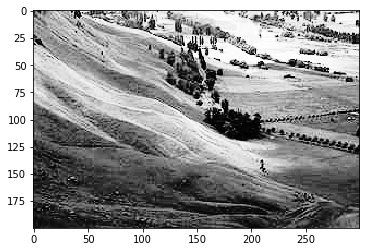

In [10]:
img = cv2.imread('unequalized.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')

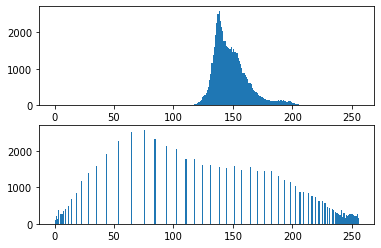

In [11]:
plt.subplot(211)
plt.hist(img.ravel(),256,[0,256])

plt.subplot(212)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

Tuy nhiên không phải lúc nào Equalize Histogram toàn bộ ảnh cũng giúp đạt kết quả mong muốn

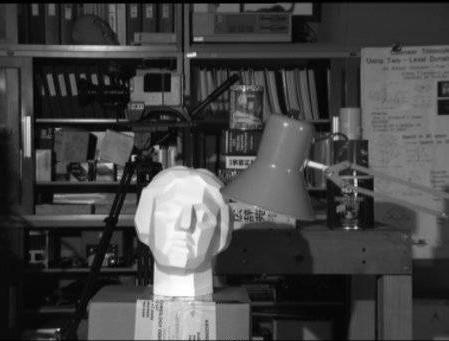

In [12]:
Image('statue_bright.jpg')

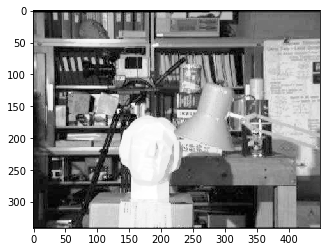

In [13]:
img = cv2.imread('statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img)
plt.imshow(equ, cmap='gray')

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Để giải quyết trường hợp này, ta cần dùng một phương pháp Histogram Equalization đặc biệt. Ảnh sẽ được chia thành các khối viên gạch "tiles" nhỏ (tileSize default của OpenCV là 8x8). Sau đó mỗi khối này được Equalize Histogram riêng. Nhờ đó histogram sẽ chỉ giới hạn trong một vùng nhỏ. 

Thư viện OpenCV cung cấp hàm:
- cv2.createCLAHE() - https://docs.opencv.org/3.3.0/d7/dbd/group__imgproc.html#gad689d2607b7b3889453804f414ab1018

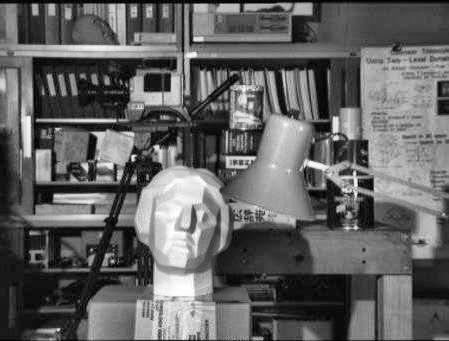

In [14]:
img = cv2.imread('statue_bright.jpg', cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img = clahe.apply(img)
cv2.imwrite('newstatue.jpg', img)
Image('newstatue.jpg')

## Một số phép biến đổi Histogram theo từng pixel

### Square transfrom

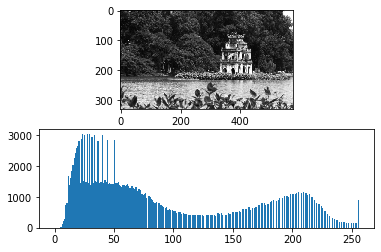

In [15]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.square(int(img[i][j]))/255)
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

### Square root transfrom

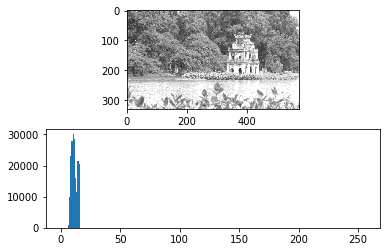

In [16]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j] = int(np.sqrt(int(img[i][j])))
plt.subplot(211)
plt.imshow(img, cmap='gray')

plt.subplot(212)
plt.hist(img.ravel(),256,[0,256])
plt.show()

## Các phép biến đổi pixel tổng quát

### Convert Scale Absolute

\begin{align}{g(i,j) = \alpha \cdot f(i,j) + \beta}
\end{align}

Các ham số α>0 và β có thể coi như là tham số điều chỉnh độ tương phản và độ sáng của ảnh.

cv2.convertScaleAbs(image, alpha=alpha, beta=beta) - https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d

### Gamma Correction

\begin{align}{O = \left( \frac{I}{255} \right)^{\gamma} \times 255}
\end{align}

Với γ<1, các cùng ảnh ban đầu bị tối sẽ được tăng sáng và histogram sẽ có xu hướng dịch chuyển sang phải, ngược lại với γ>1, ảnh sẽ được giảm sáng.

gamma_correction(image, gamma=gamma)

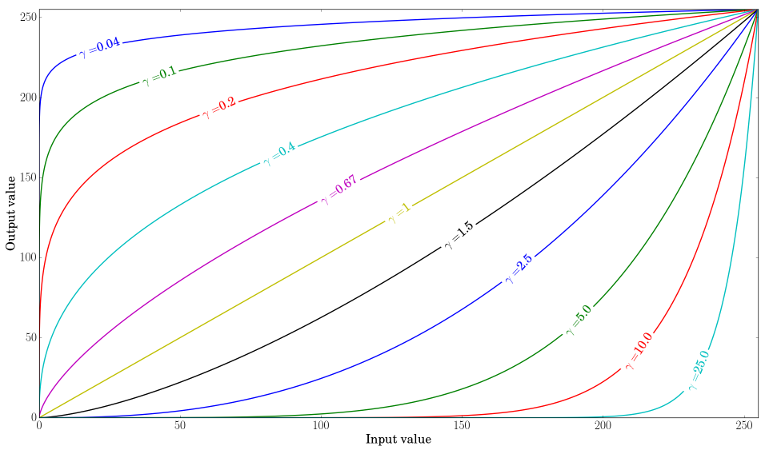

In [17]:
Image('Gamma_Correction.png')

In [18]:
def gamma_correction(img, gamma):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j] = ((int(img[i][j])/255.0) ** gamma)*255
    return img

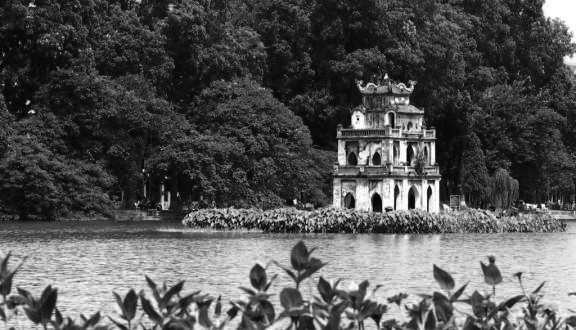

In [19]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
img = gamma_correction(img, 2)
cv2.imwrite('gammaHoGuom.jpg', img)
Image('gammaHoGuom.jpg')

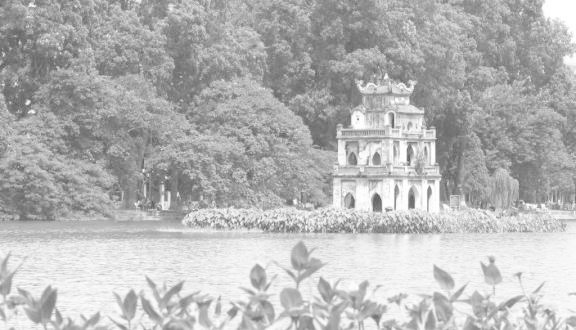

In [20]:
img = cv2.imread('HoGuom.jpg', cv2.IMREAD_GRAYSCALE)
img = gamma_correction(img, 0.5)
cv2.imwrite('gammaHoGuom.jpg', img)
Image('gammaHoGuom.jpg')

## II. Image Filtering, Convolutions and Cross-correlations

cv2.filter2D - https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#filter2d

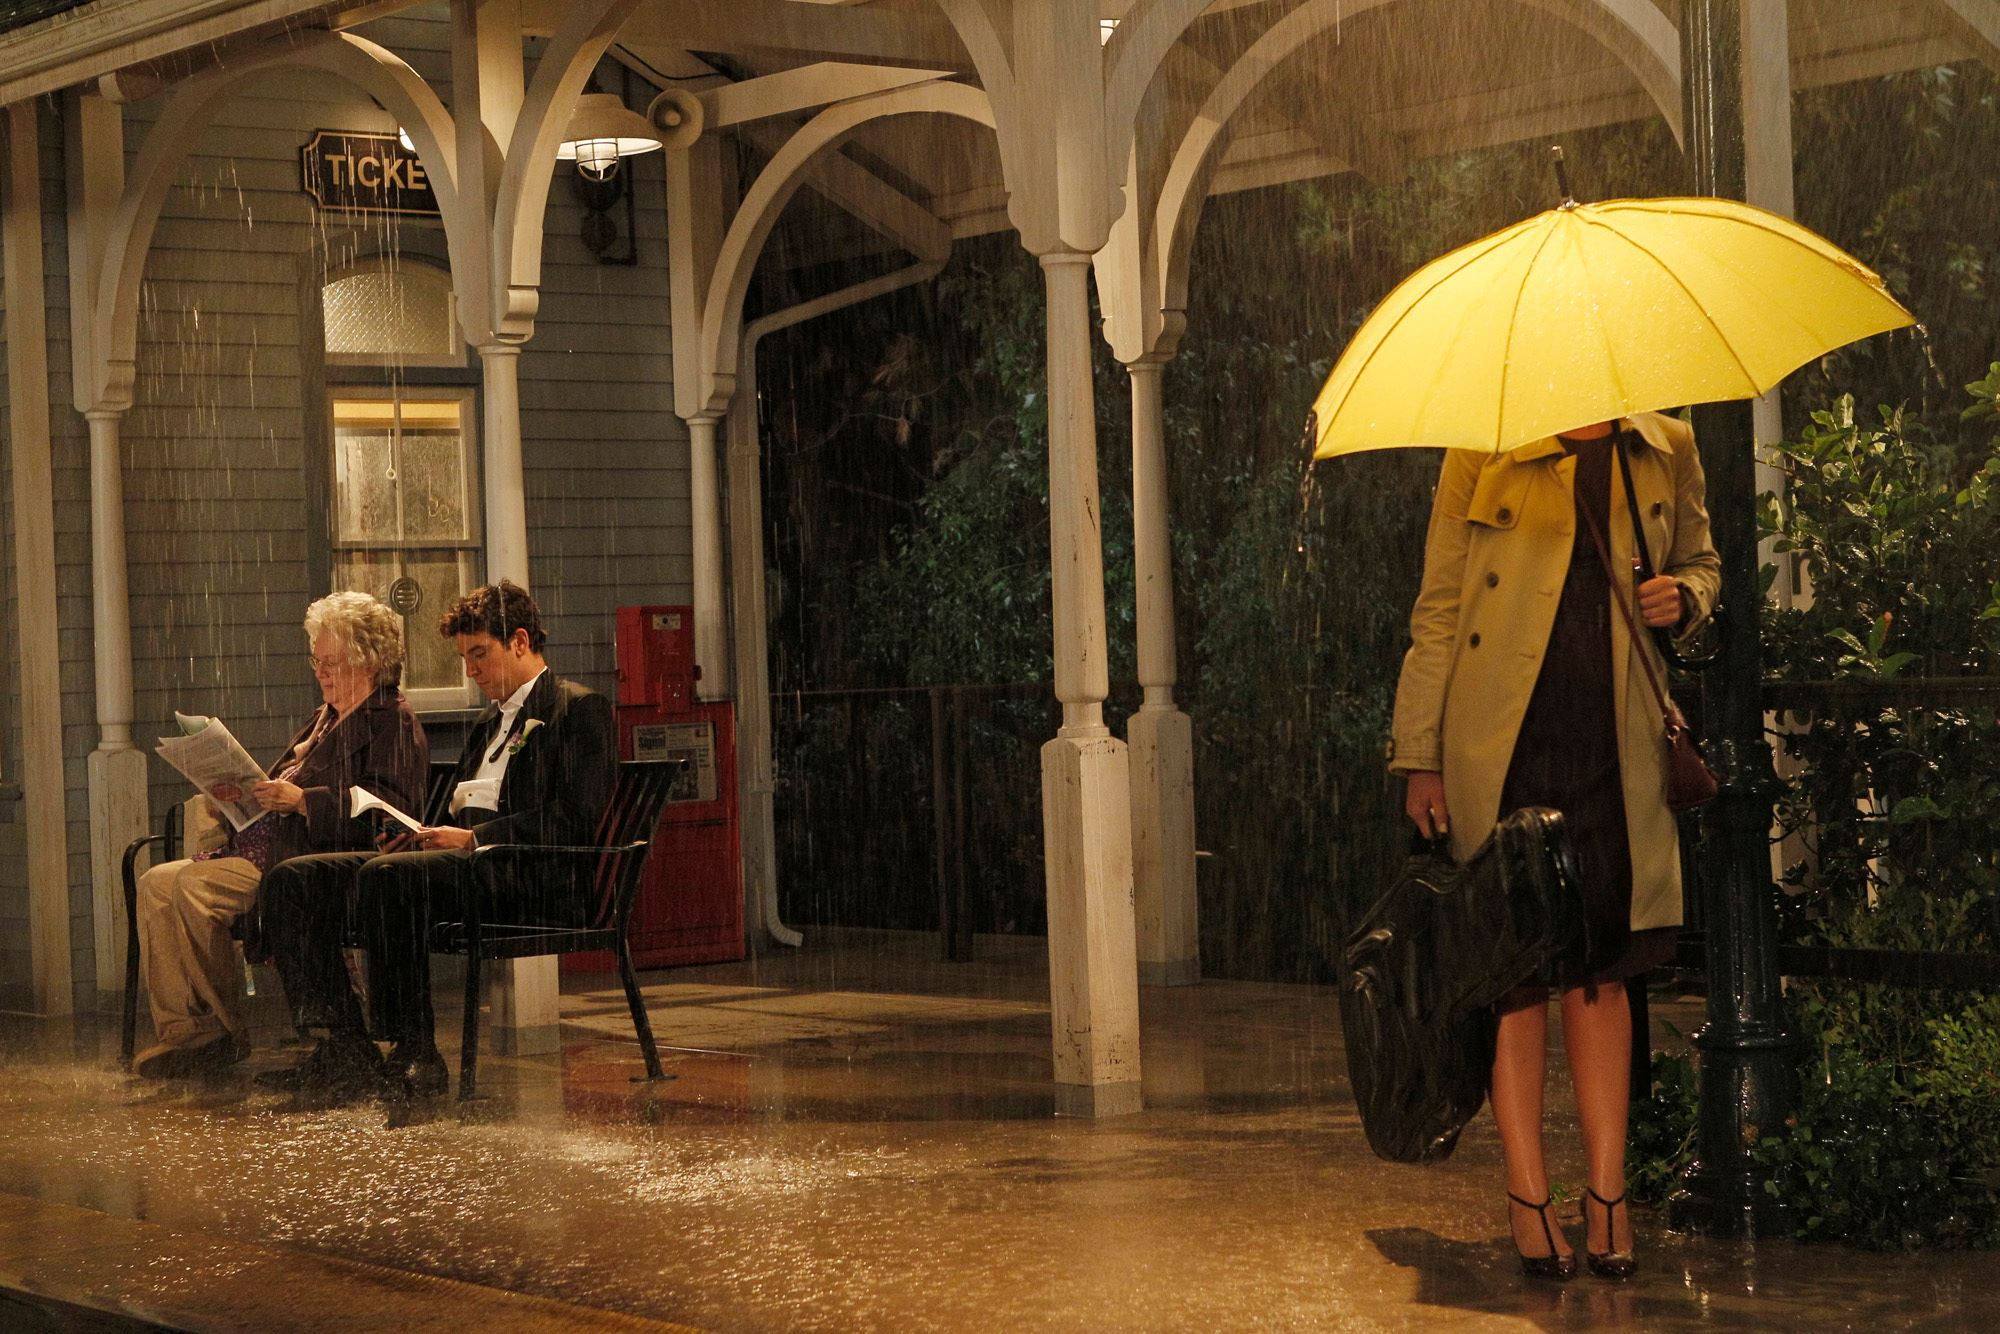

In [21]:
Image('himym.jpg')

Averaging kernel - Kernel lấy trung bình các điểm ảnh xung quanh

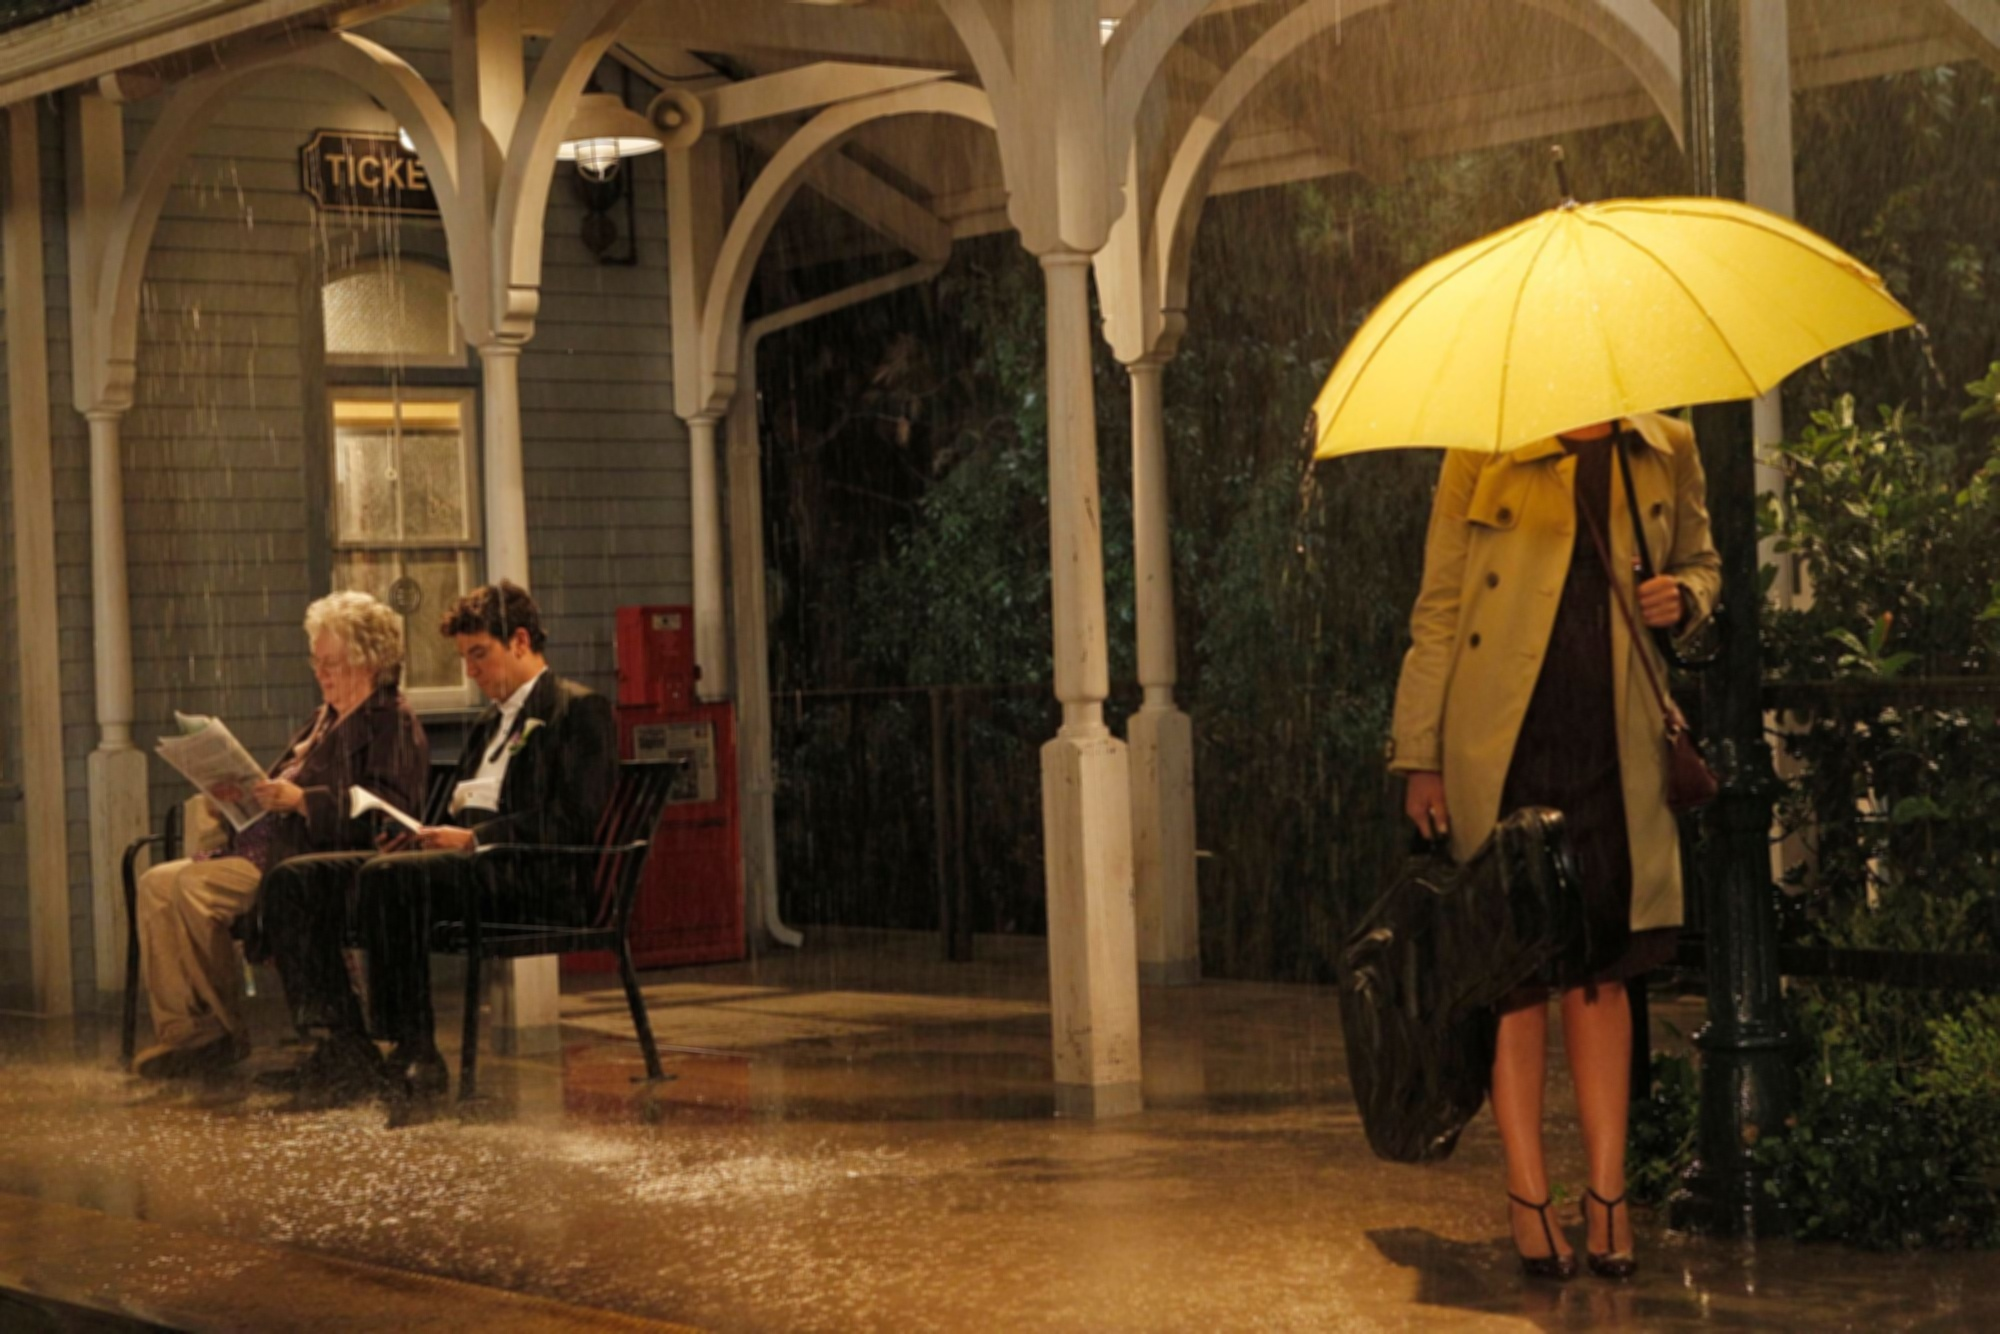

In [22]:
img = cv2.imread('himym.jpg', cv2.IMREAD_COLOR)
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img, -1, kernel)
cv2.imwrite('newhimym.jpg', img)
Image('newhimym.jpg')

Sharpening kernel - Kernel tăng độ nét của ảnh

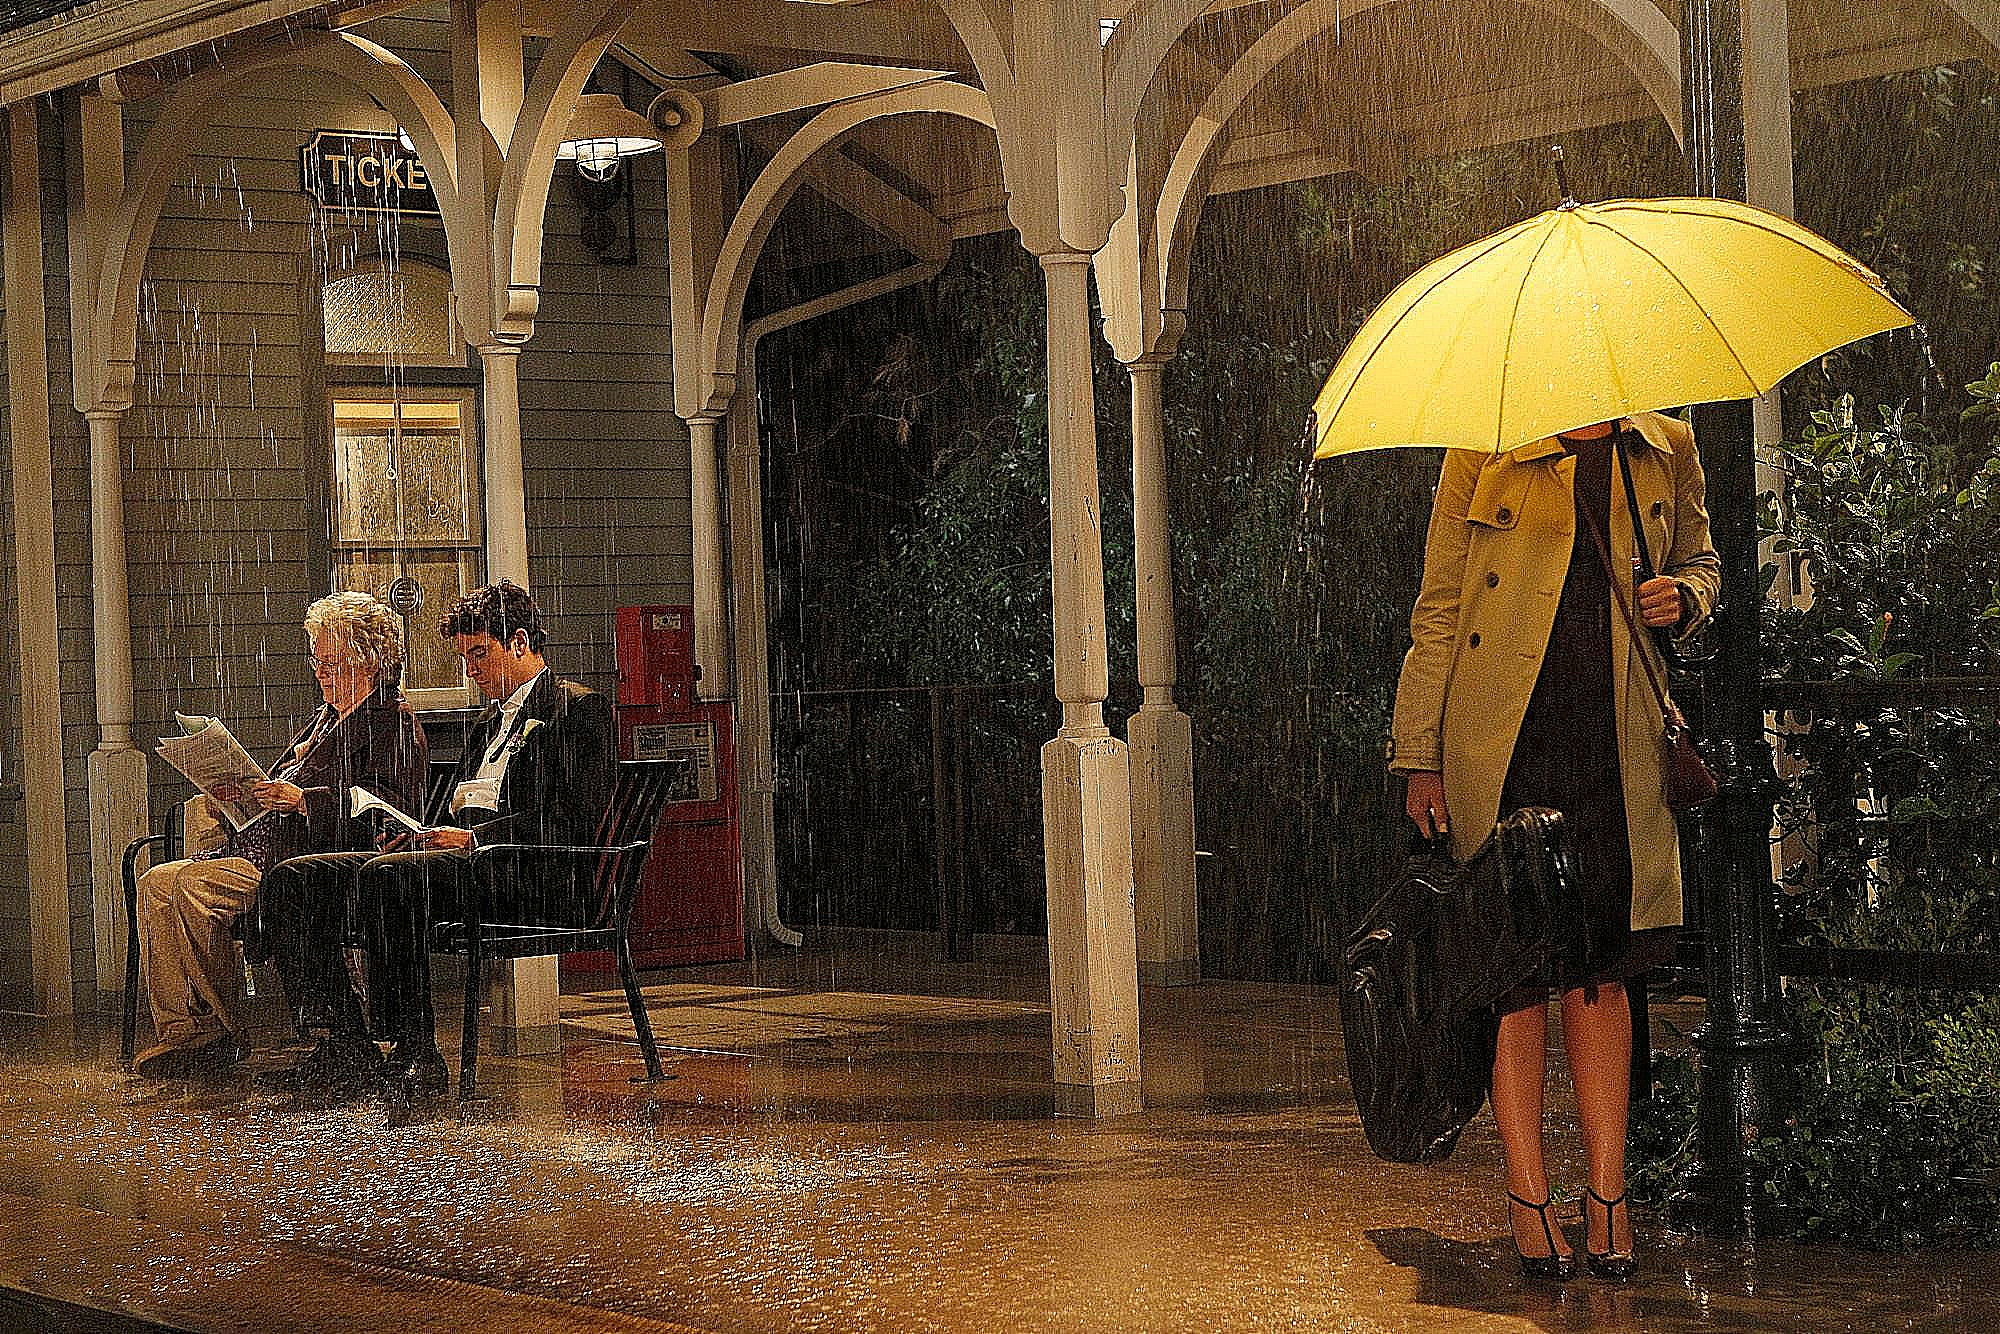

In [23]:
img = cv2.imread('himym.jpg', cv2.IMREAD_COLOR)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)
cv2.imwrite('newhimym.jpg', img)
Image('newhimym.jpg')

### Blur, GaussiannBlur, medianBlur,...

Một số kernel đặc biệt dùng để làm mịn ảnh.

https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#blur

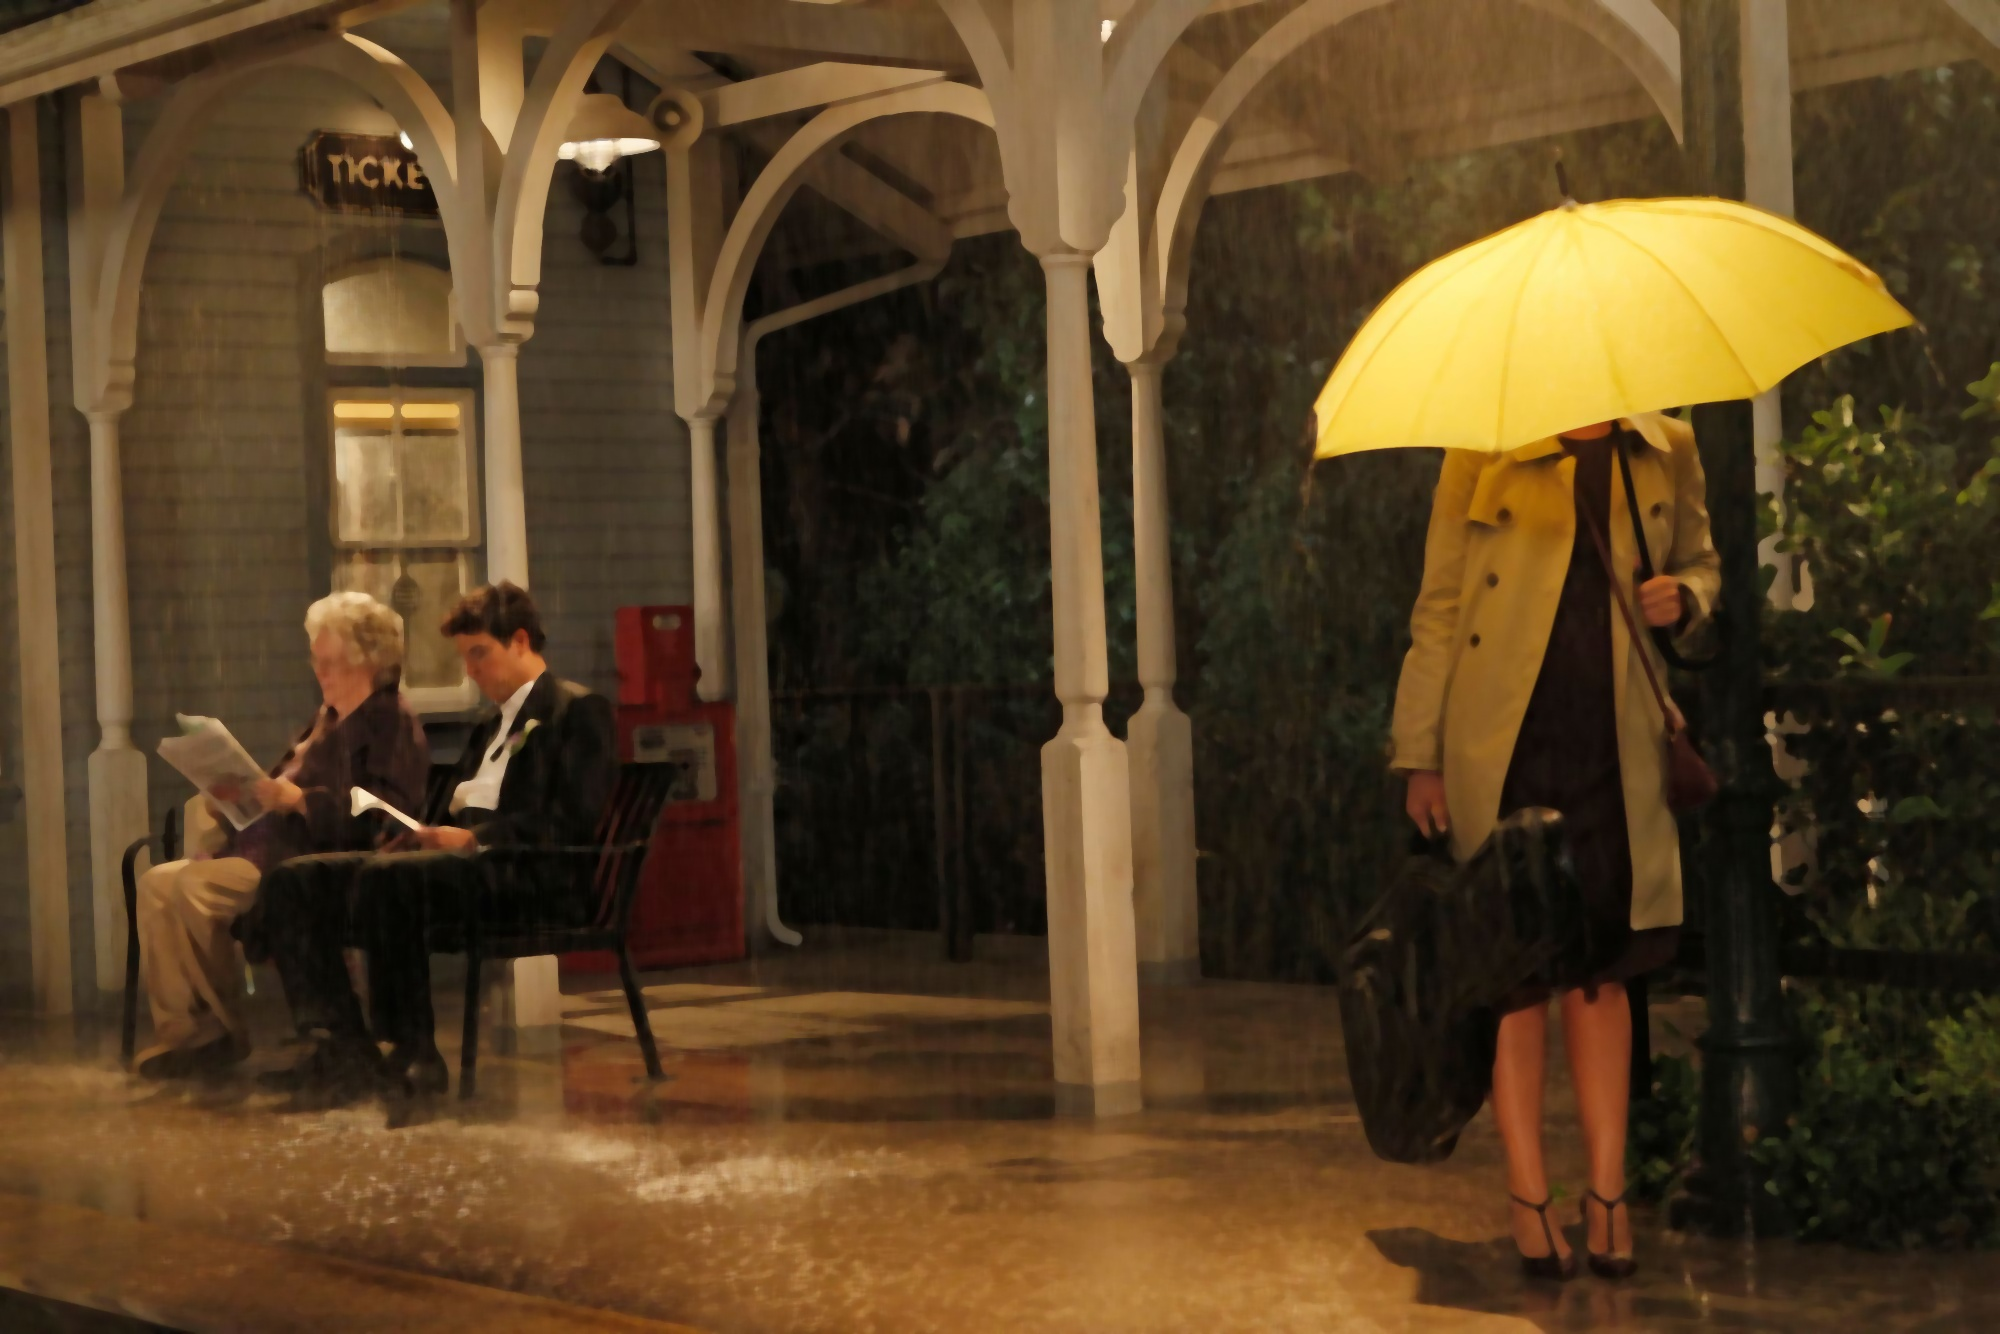

In [24]:
img = cv2.imread('himym.jpg', cv2.IMREAD_COLOR)

# img = cv2.blur(img, (7, 7), 0)
# img = cv2.GaussianBlur(img, (9, 9), 0)
img = cv2.medianBlur(img, 9)

cv2.imwrite('newhimym.jpg', img)
Image('newhimym.jpg')

# Bài tập thực hành

Khử nhiễu và tăng chất lượng ảnh ở các bài tập sau

## Bài tập 1: Noise Reduction

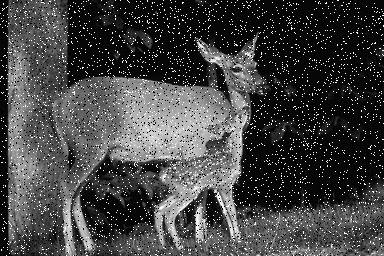

In [25]:
Image('deer_salt.jpg')

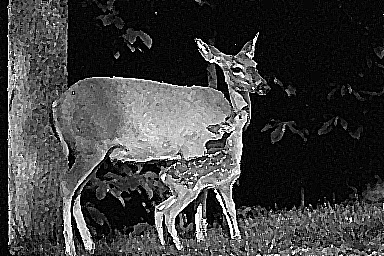

In [29]:
img = cv2.imread('deer_salt.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###

img = cv2.medianBlur(img, 3)

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)

### YOUR CODE HERE ###

cv2.imwrite('newdeer.jpg', img)
Image('newdeer.jpg')

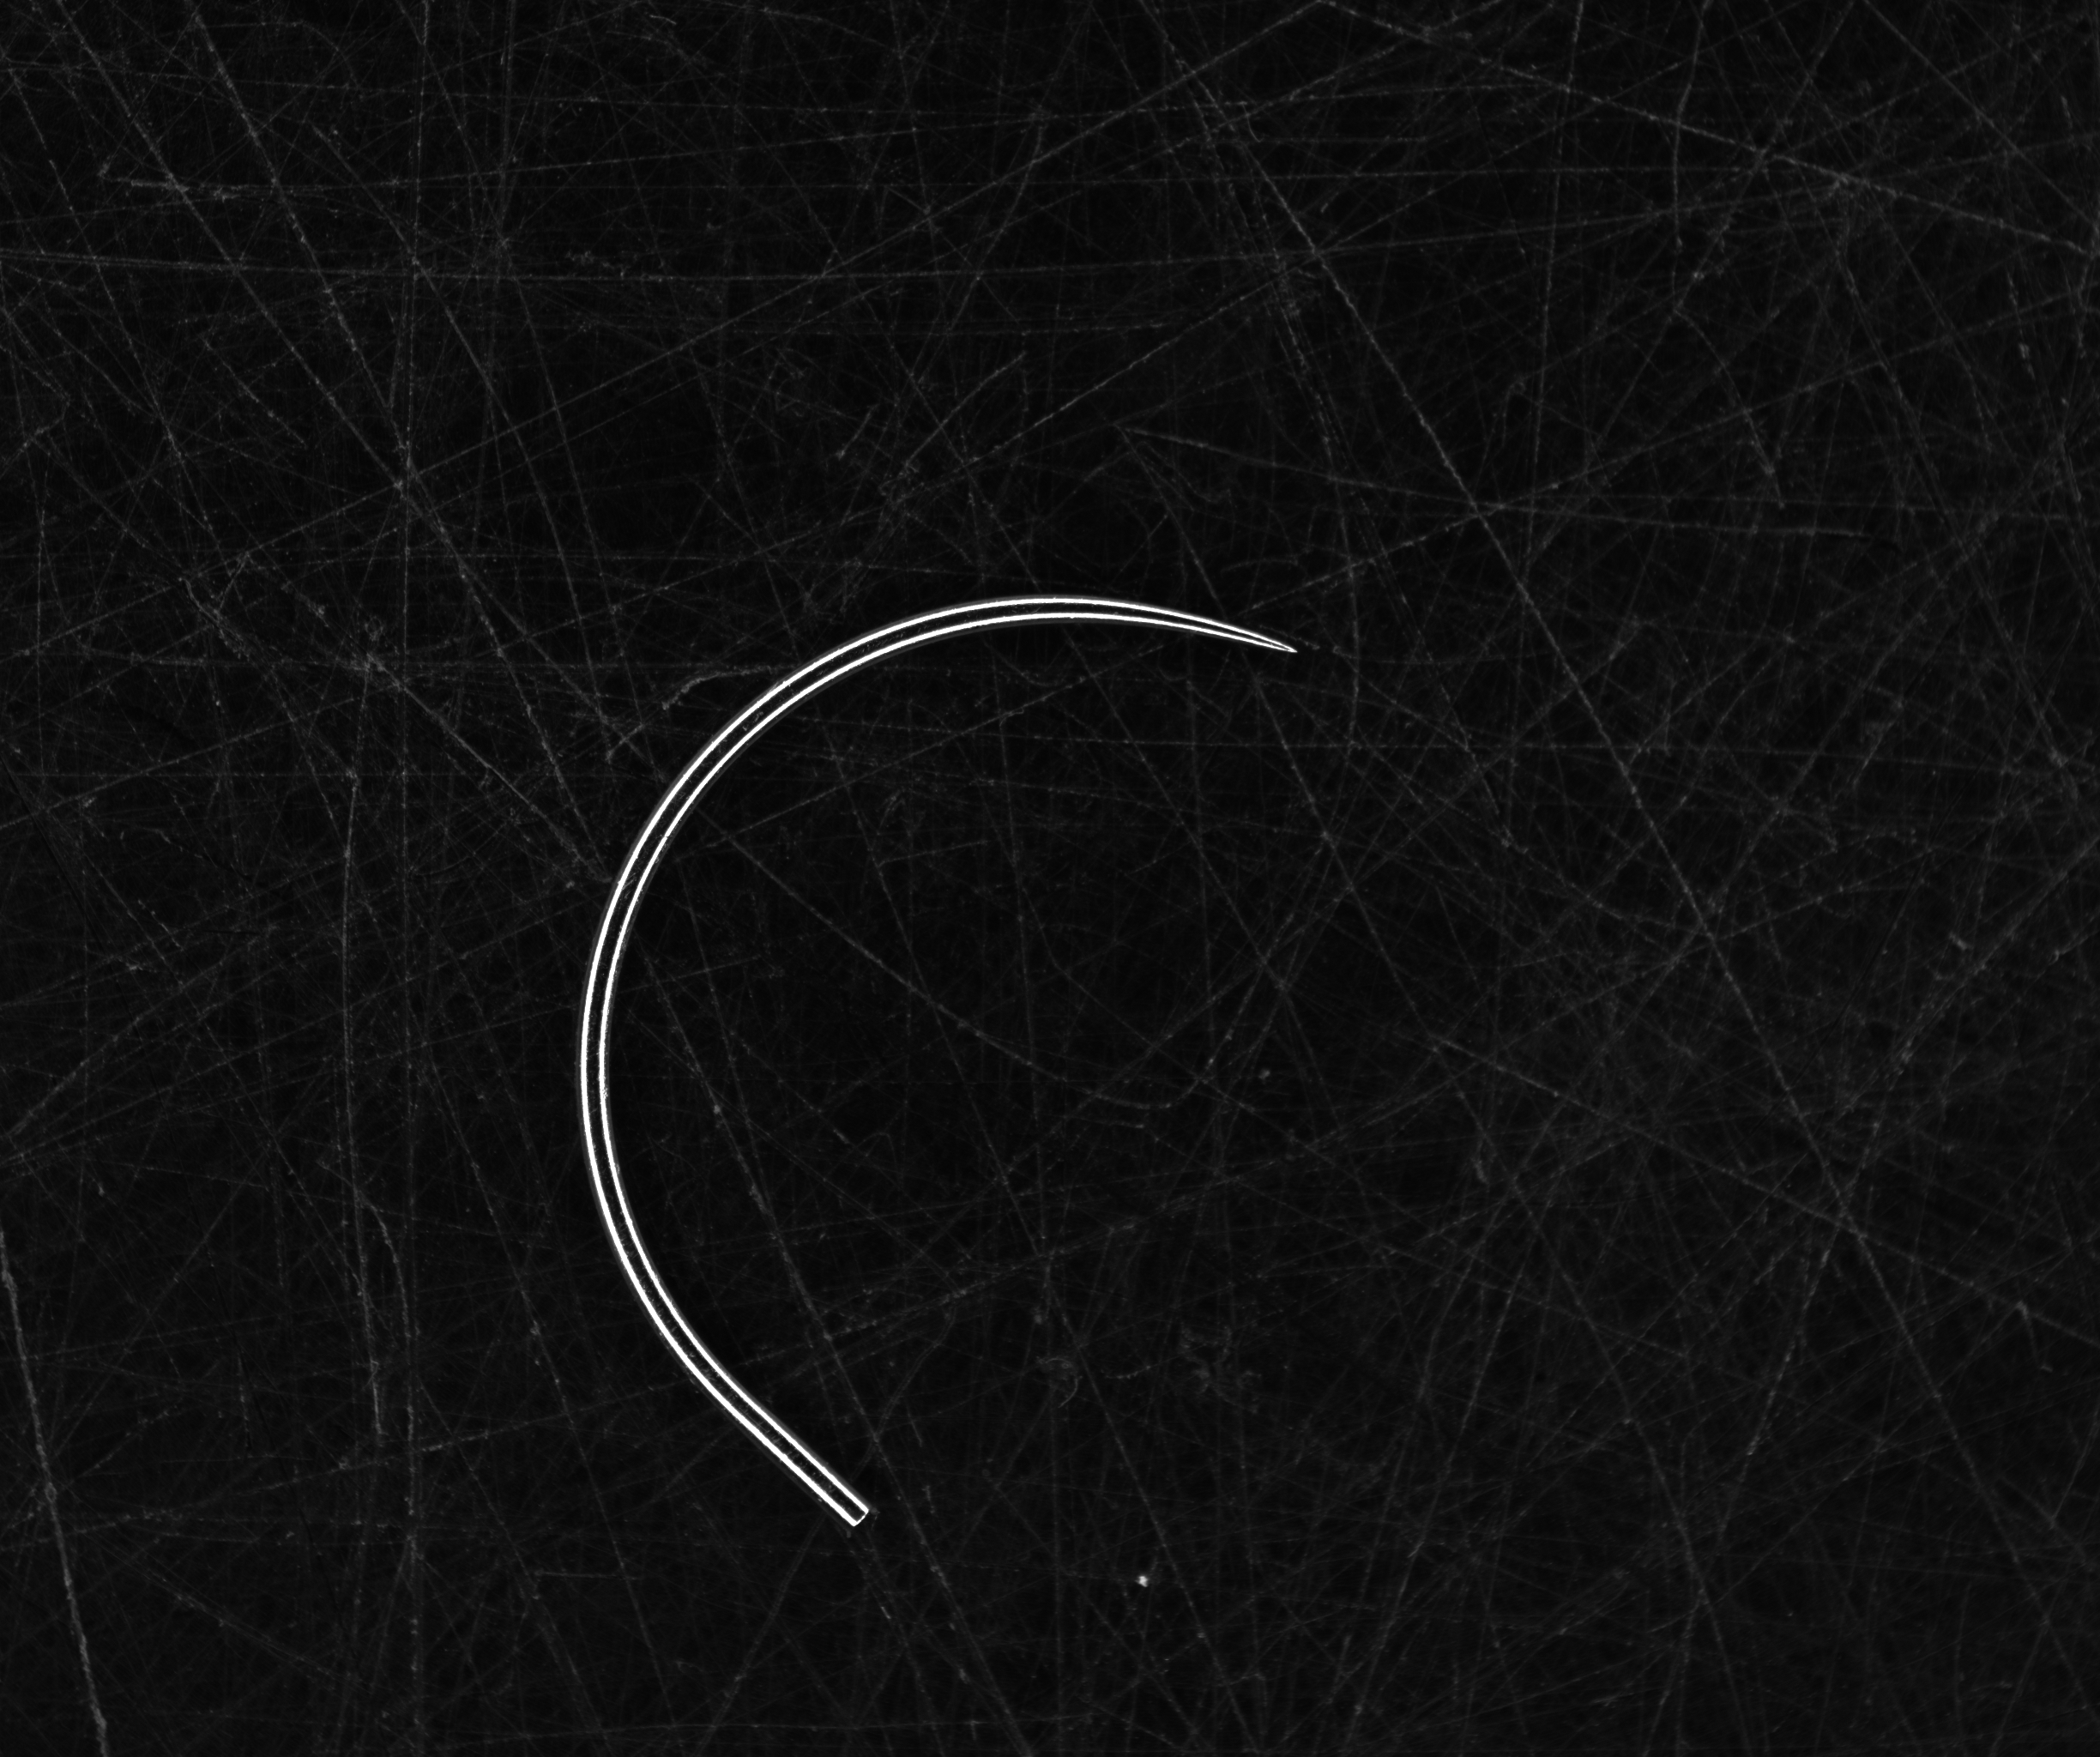

In [27]:
Image('needle1.png')

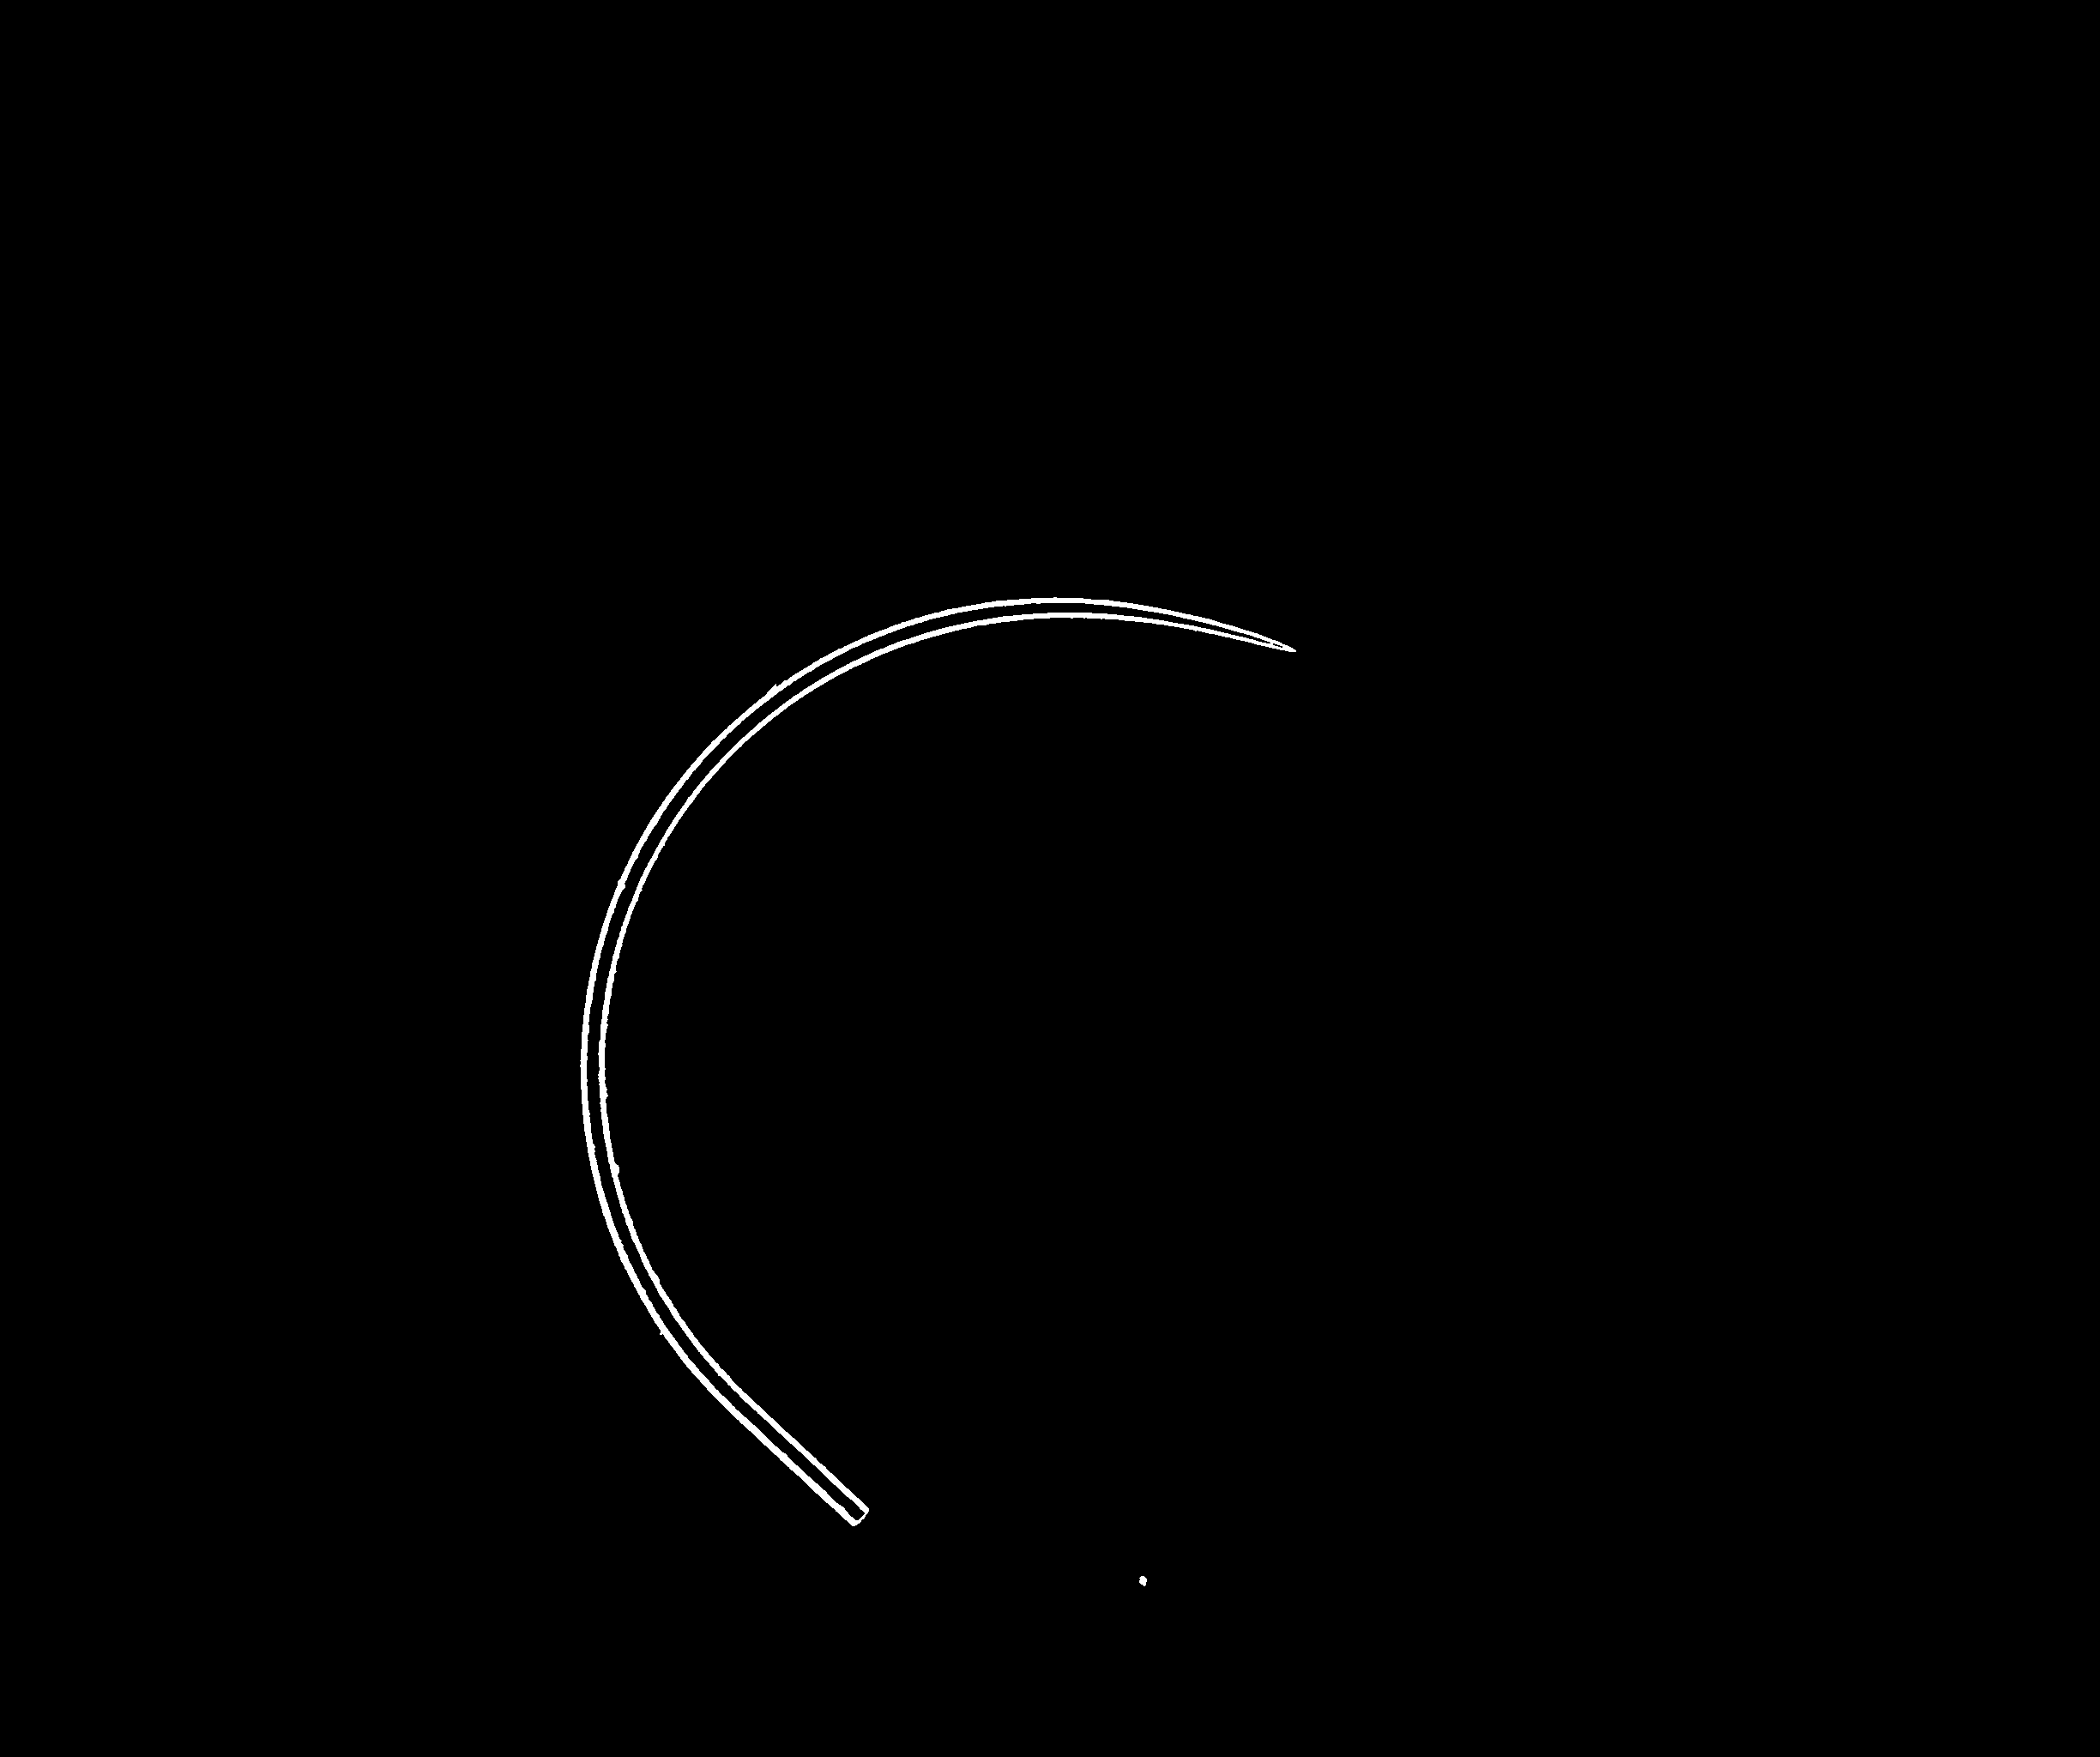

In [30]:
img = cv2.imread('needle1.png', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###

img = cv2.medianBlur(img, 3)

# make the whole picture more contrast 
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 100:
            img[i][j] = 0
        else:
            img[i][j] = 255

### YOUR CODE HERE ###
            
cv2.imwrite('needle1_new.png', img)
Image('needle1_new.png')

## Bài tập 2: Image Enhancement
### 1. Moon

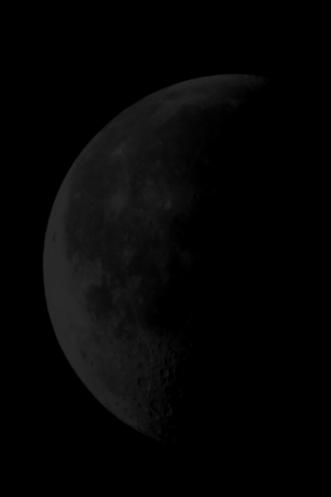

In [31]:
Image('moon_dark.jpg')

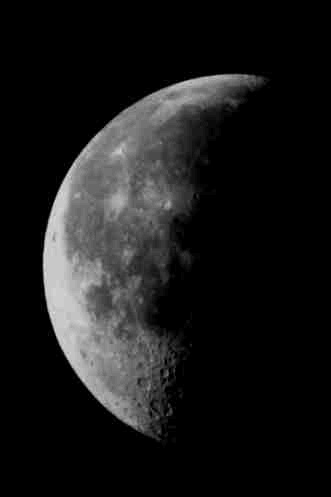

In [34]:
img = cv2.imread('moon_dark.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
img = cv2.convertScaleAbs(img, 1.1, 5)

### YOUR CODE HERE ###

cv2.imwrite('newmoon.jpg', img)
Image('newmoon.jpg')

### 2. Balloon

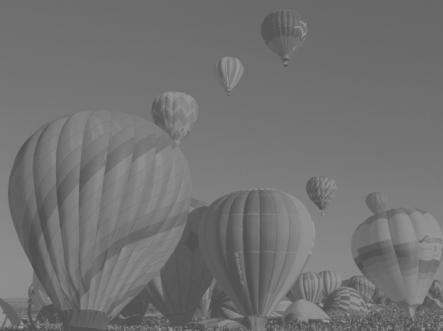

In [35]:
Image('balloon.jpg')

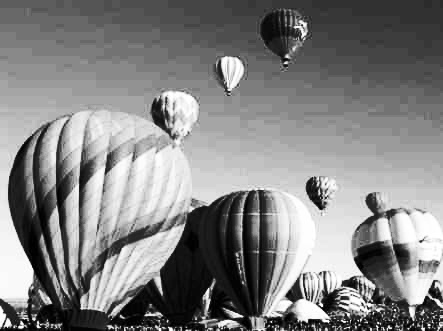

In [36]:
img = cv2.imread('balloon.jpg', cv2.IMREAD_GRAYSCALE)

### YOUR CODE HERE ###
img = cv2.equalizeHist(img)

### YOUR CODE HERE ###

cv2.imwrite('newballoon.jpg', img)
Image('newballoon.jpg')

### 3. Girl

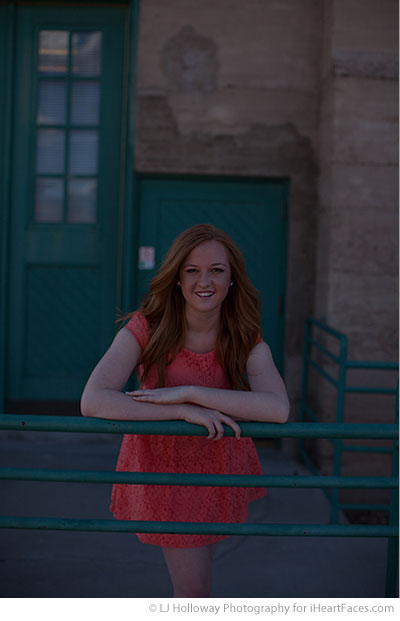

In [37]:
Image('girl1_dark.jpg')

In [38]:
img = cv2.imread('girl1_dark.jpg')

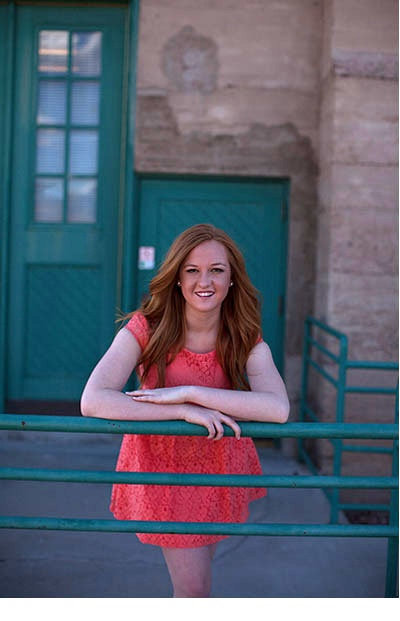

In [39]:
img = cv2.imread('girl1_dark.jpg')

### YOUR CODE HERE ###

img = cv2.convertScaleAbs(img, 1.3, 2)

### YOUR CODE HERE ###

cv2.imwrite('newgirl1.jpg', img)
Image('newgirl1.jpg')

# BÀI TẬP VỀ NHÀ

Sử dụng các phương pháp cải thiện chất lượng ảnh đã học để cải thiện các ảnh trong thư mục homework. Đối với các trường hợp sử dụng cân bằng histogram, vẽ histogram của ảnh trước và sau khi áp dụng.

### Khử nhiễu

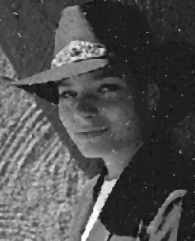

In [52]:
Image('homework/noise.png')
img = cv2.imread('homework/noise.png', cv2.IMREAD_GRAYSCALE)

img = cv2.medianBlur(img, 3)
cv2.imwrite('homework/noise_new.png', img)
Image('homework/noise_new.png')

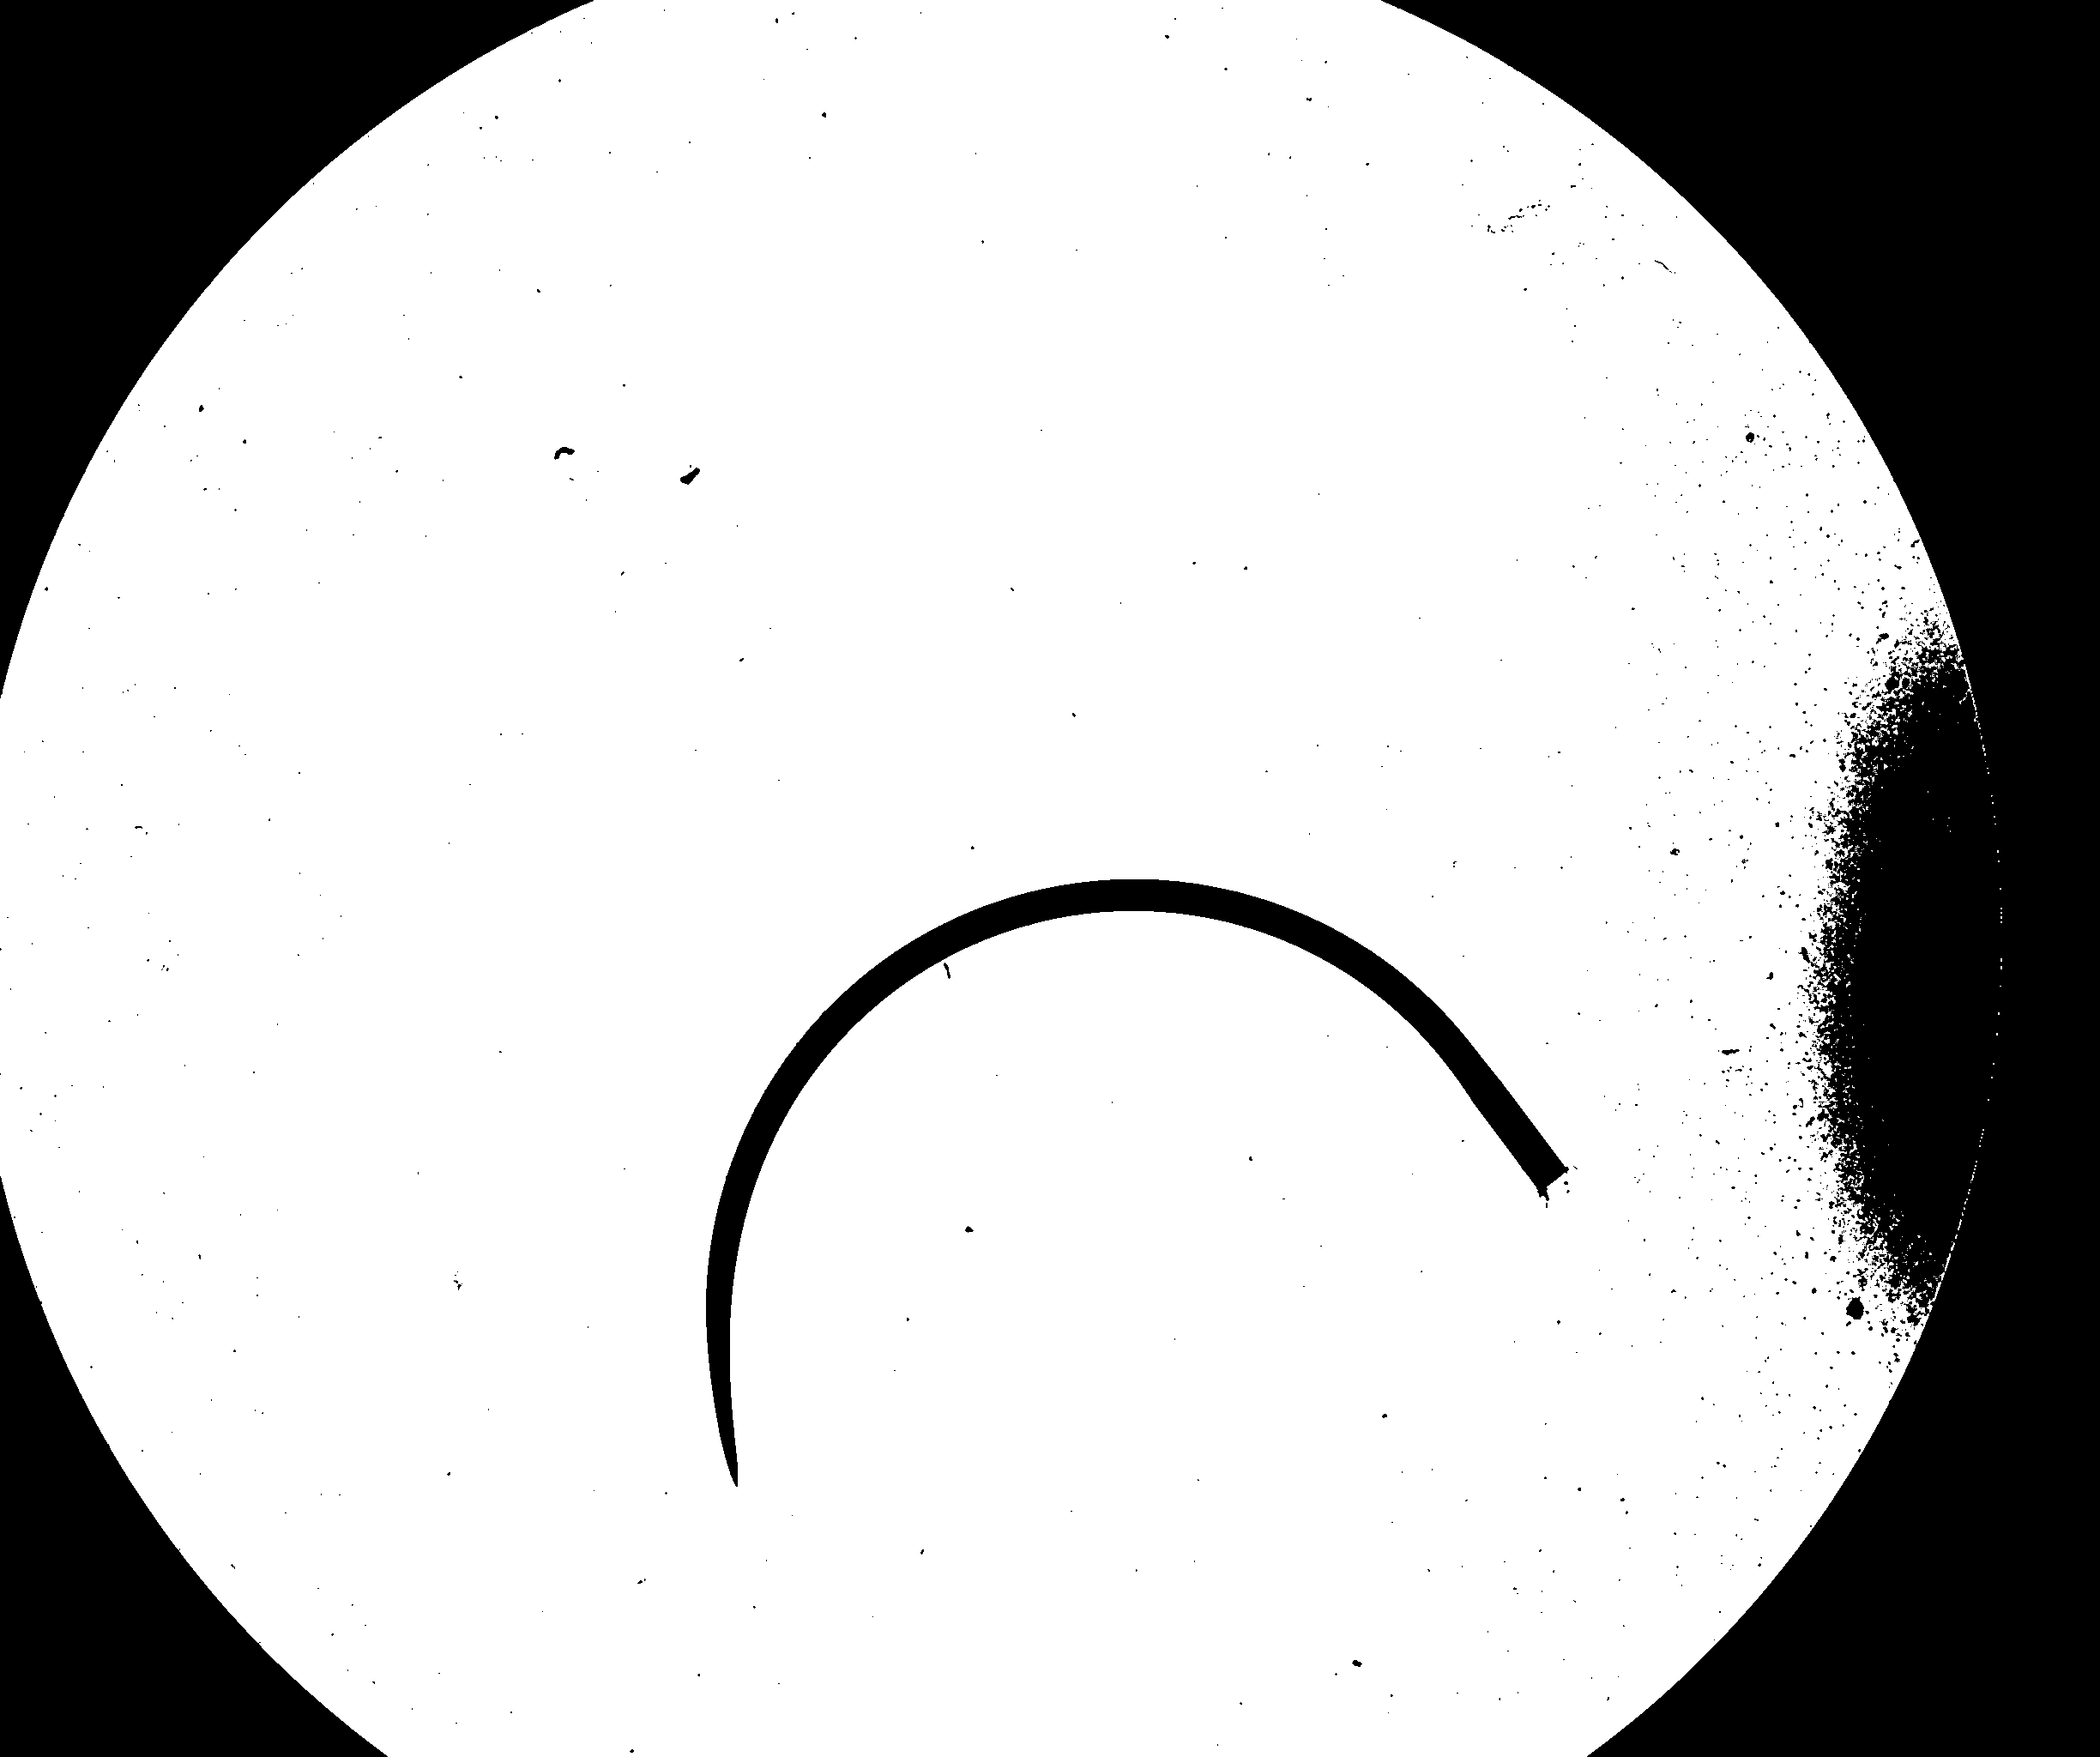

In [53]:
Image('homework/needle2.png')
img = cv2.imread('homework/needle2.png', cv2.IMREAD_GRAYSCALE)

img = cv2.medianBlur(img, 3)

# make the whole picture more contrast 
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 100:
            img[i][j] = 0
        else:
            img[i][j] = 255

cv2.imwrite('homework/needle2_new.png', img)
Image('homework/needle2_new.png')

### Cải thiện chất lượng

Before Enhancement


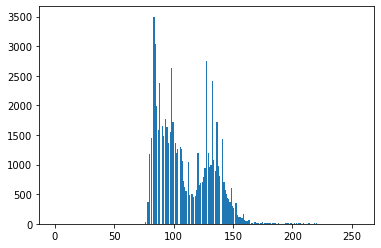

After Enhancement


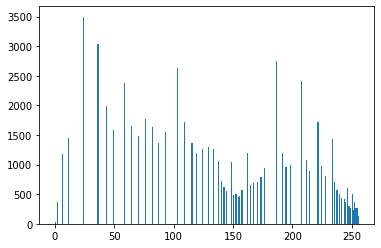

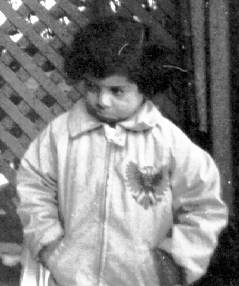

In [57]:
Image('homework/kid.png')
img = cv2.imread('homework/kid.png', cv2.IMREAD_GRAYSCALE)

# before
print('Before Enhancement')
plt.hist(img.ravel(),256,[0,256]); plt.show()

img = cv2.equalizeHist(img)

# after
print('After Enhancement')
plt.hist(img.ravel(),256,[0,256]); plt.show()


cv2.imwrite('homework/kid_new.png', img)
Image('homework/kid_new.png')

Before Enhancement


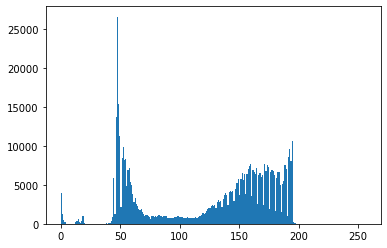

After Enhancement


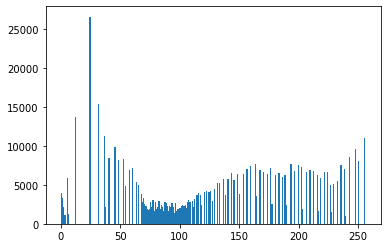

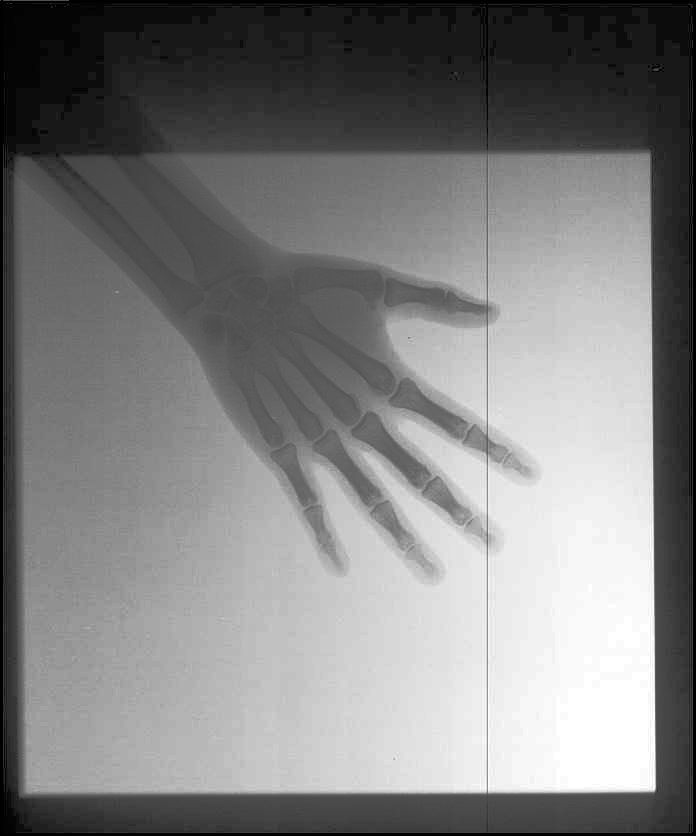

In [58]:
Image('homework/hand.jpg')
img = cv2.imread('homework/hand.jpg', cv2.IMREAD_GRAYSCALE)

# before
print('Before Enhancement')
plt.hist(img.ravel(),256,[0,256]); plt.show()

img = cv2.equalizeHist(img)

# after
print('After Enhancement')
plt.hist(img.ravel(),256,[0,256]); plt.show()


cv2.imwrite('homework/hand_new.jpg', img)
Image('homework/hand_new.jpg')

### Tăng sáng

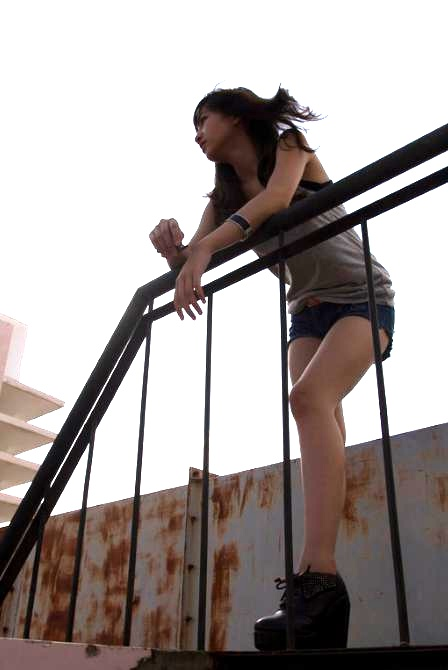

In [65]:
Image('homework/girl2_dark.jpg')
img = cv2.imread('homework/girl2_dark.jpg')

img = cv2.convertScaleAbs(img, 1.3, 2)


cv2.imwrite('homework/girl2_dark_new.jpg', img)
Image('homework/girl2_dark_new.jpg')

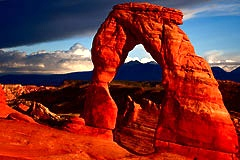

In [68]:
Image('homework/mountain_dark.jpg')
img = cv2.imread('homework/mountain_dark.jpg')

img = cv2.convertScaleAbs(img, 1.1, 1.8)


cv2.imwrite('homework/mountain_dark_new.jpg', img)
Image('homework/mountain_dark_new.jpg')